In [4]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

In [13]:
analysis_data_centers = ['52.95.127.226 AWS Dublin', '8.208.40.164 Alibaba London', '134.70.116.1 Oracle Montreal', '52.46.142.78 AWS N.Virginia']
analysis_data_tags = ['ETHERNET', 'LTE', 'SAT', 'WIFI']

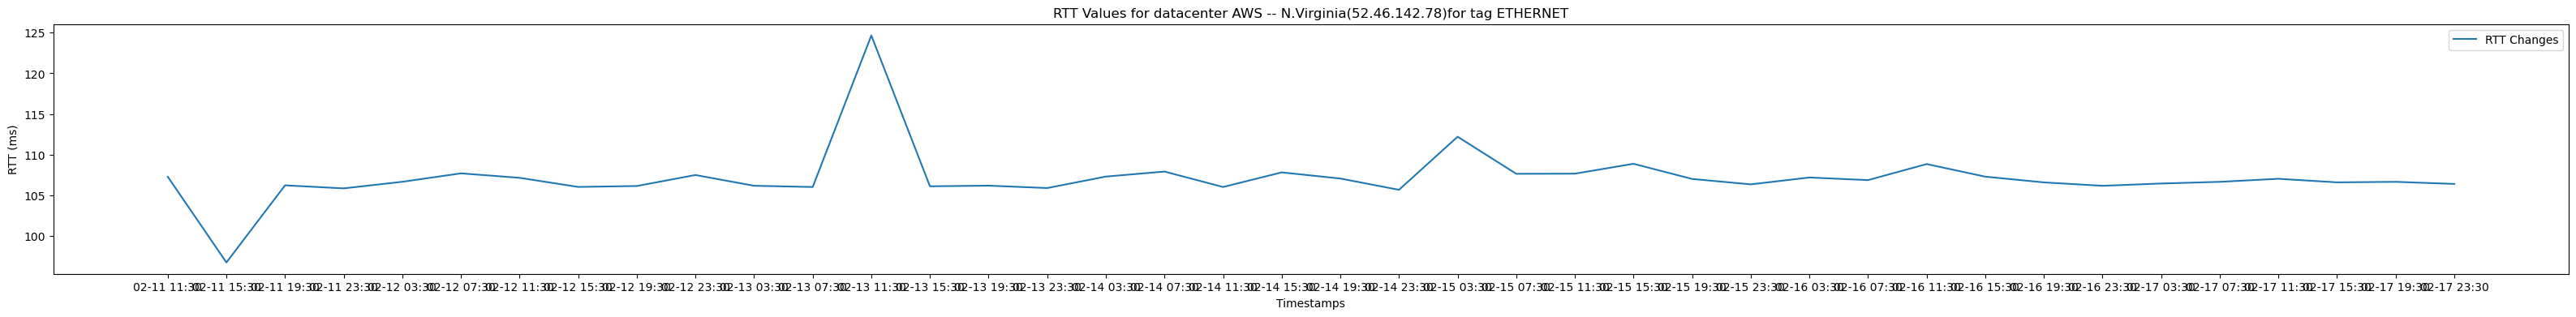

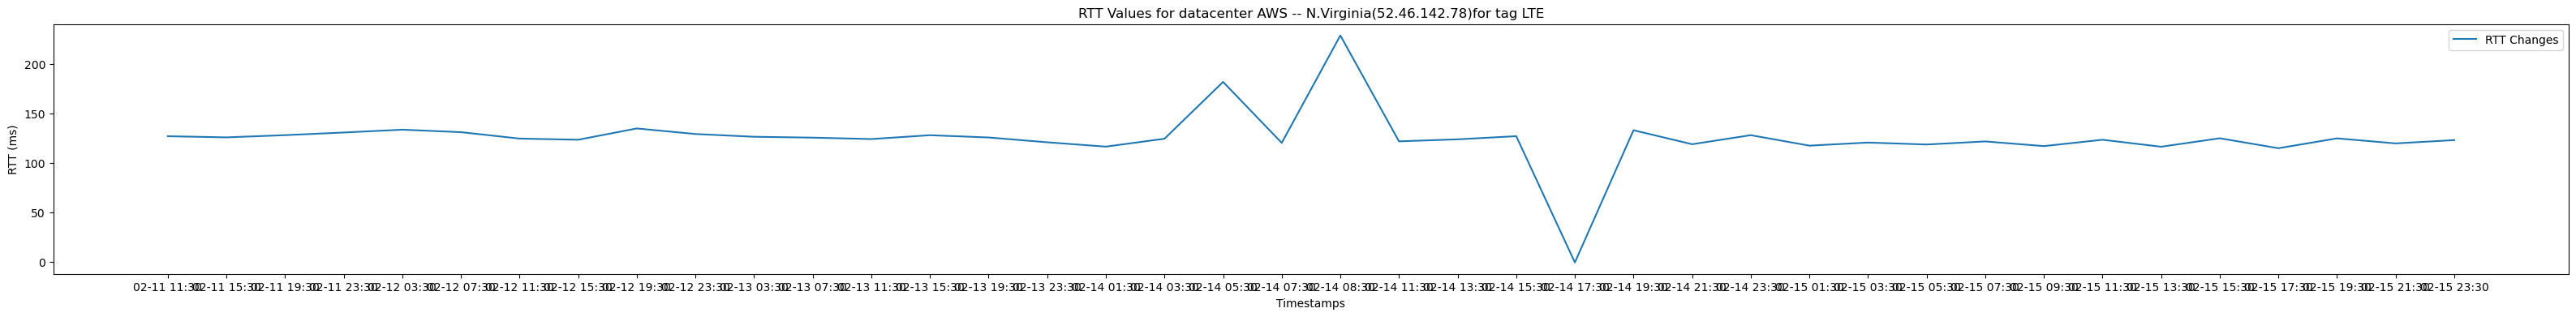

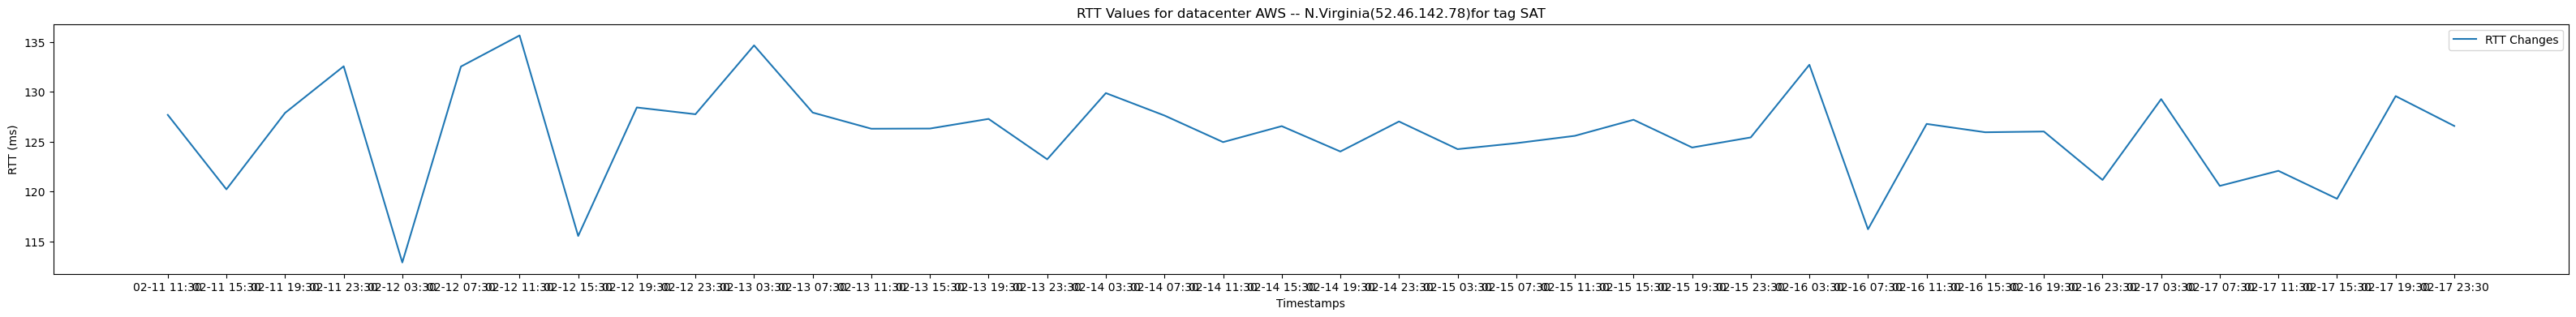

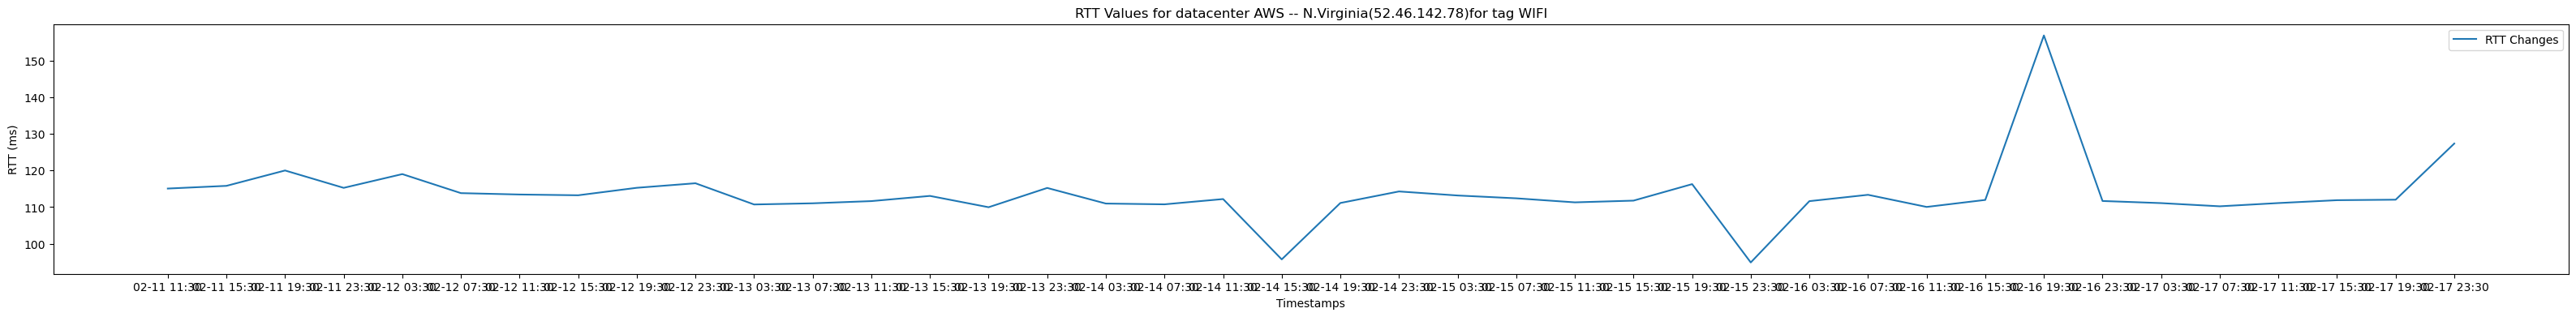

In [14]:
for each_data_center in analysis_data_centers:
    data_center_name = each_data_center.split(' ')[1] + ' -- ' + each_data_center.split(' ')[2]
    
    for each_data_tag in range(len(analysis_data_tags)):
        timestamp_rtts = []
        try: 
            with open('./data/' + each_data_center.split(' ')[0] + '_' + analysis_data_tags[each_data_tag] + '.json', 'r') as file:
                json_data = json.load(file)

                for each_probe_result in json_data:
                    timestamp_rtts.append((each_probe_result['timestamp'], each_probe_result['avg']))
        except Exception as e:
            continue
        
        datetime_objects = [datetime.utcfromtimestamp(ts) for ts, _ in timestamp_rtts]
        time_window = timedelta(minutes=60)
        groups = defaultdict(list)
        for (timestamp, value), dt_obj in zip(timestamp_rtts, datetime_objects):
            key = dt_obj - (dt_obj - datetime.min) % time_window 
            groups[key].append(value)
        averages = [(key + time_window / 2, sum(group) / len(group)) for key, group in groups.items()]
        result_of_grouped_timestamps = [(int(average[0].timestamp()), average[1]) for average in averages]
        result_of_grouped_timestamps = result_of_grouped_timestamps[:40]
        
        timestamps = []
        rtts = []
        for each_pair in result_of_grouped_timestamps:
            timestamps.append(datetime.fromtimestamp(each_pair[0]).strftime('%m-%d %H:%M'))
            rtts.append(each_pair[1])
           
        plt.figure(figsize=(40, 4))  
        plt.plot(timestamps, rtts, label='RTT Changes')

        plt.xlabel('Timestamps')
        plt.ylabel('RTT (ms)')
        plt.title('RTT Values for datacenter ' + data_center_name + '(' + each_data_center.split(' ')[0] + ')' + 'for tag ' + analysis_data_tags[each_data_tag])

        plt.legend()
        plt.show()